# <center> Credit Score Classification

### Problem Statement
- You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

### Task
- Given a person’s credit-related information, build a machine learning model that can classify the credit score.

## Table of content
- Packages importing
- Reading Data
- Data Exploration
- Data cleaning
- Data Preprocessing
- Modeling & Evaluation


## Packages importing

In [1]:
# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline


# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re

# Modeling and evaluation
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib

# Packages options
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings
warnings.filterwarnings("ignore")

c:\Users\mansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## Reading Data

In [2]:
#importing the credit classification dataset
df = pd.read_csv("F:\ML LAB\case study\credit.csv")

In [3]:
df.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
22360,39174,48856,1,Malonef,20.0,510248765.0,Scientist,74449.440,6251.120000,7.0,...,Bad,2646.00,37.301510,68.0,Yes,319.669520,69.104472,High_spent_Small_value_payments,334.170775,Poor
89653,140111,19737,6,Svea Herbst-Baylissf,15.0,809230817.0,Media_Manager,7448.780,795.731667,3.0,...,Standard,1362.72,30.734616,242.0,Yes,8.593567,14.511727,Low_spent_Large_value_payments,306.452288,Standard
73701,116183,7760,6,Stephenw,28.0,812896100.0,Lawyer,31500.550,2665.045833,1.0,...,Good,861.13,31.478348,230.0,No,0.000000,38.947468,Low_spent_Small_value_payments,386.145137,Poor
96048,149706,38580,1,Katie Reidu,14.0,574430696.0,Teacher,18611.390,1758.949167,10.0,...,Bad,3209.39,24.719549,40.0,Yes,81.657242,36.586494,High_spent_Medium_value_payments,307.651181,Poor
12747,24753,47403,4,LaCapraq,24.0,501272873.0,Doctor,10357.485,1105.781183,9.0,...,Bad,2415.22,36.476396,200.0,Yes,114.371075,26.181052,High_spent_Small_value_payments,251.796332,Poor
42763,69777,43940,4,Patrick Temple-Westj,48.0,526999750.0,Engineer,19462.925,1611.910417,1.0,...,Good,160.30,34.765590,384.0,NM,45.064231,11.758685,High_spent_Large_value_payments,318.507903,Good
71182,112404,34806,7,arbara Listond,24.0,708316386.0,Engineer,21404.240,1887.686667,4.0,...,Standard,132.26,34.229797,172.0,Yes,21.310599,14.809830,High_spent_Large_value_payments,370.155383,Standard
66082,104756,2181,3,Jessica Wohls,31.0,830836678.0,Journalist,44942.230,3926.185833,1.0,...,Good,1058.03,36.117494,341.0,No,26.778409,29.447308,High_spent_Small_value_payments,482.637298,Standard
94679,147649,42643,8,Stempely,56.0,223852426.0,Media_Manager,13251.255,1318.271250,4.0,...,Standard,921.57,24.840875,226.0,No,5.748476,0.000000,Low_spent_Small_value_payments,362.301563,Standard
94166,146880,7318,7,Ryan Vlastelicaw,53.0,725995987.0,Teacher,43802.270,3394.189167,4.0,...,Good,1208.70,31.912684,389.0,No,119.077809,36.282421,High_spent_Small_value_payments,244.041635,Poor


## Data Exploration

In [4]:
df.shape

(100000, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [7]:
df.duplicated().sum()

np.int64(0)

(array([    0., 10000., 20000., 30000., 40000., 50000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000')])

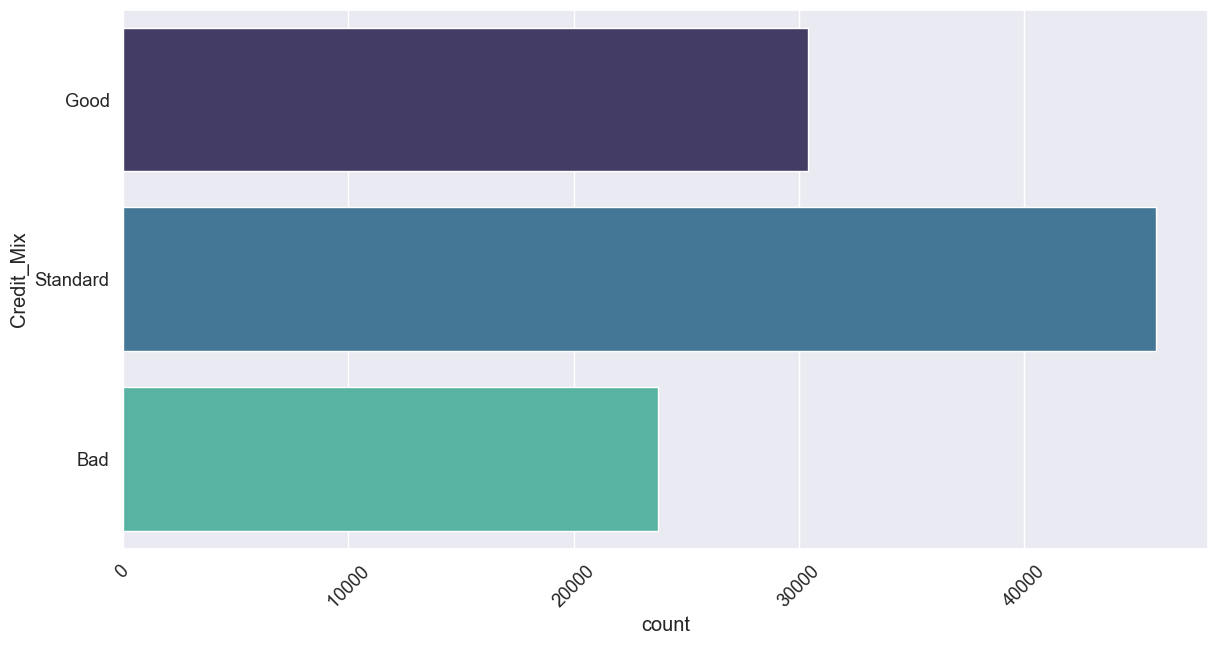

In [8]:
sns.countplot(df['Credit_Mix'],palette="mako")
plt.xticks(rotation=45)

In [9]:
df['Credit_Score'].value_counts(normalize=True)

Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

In [10]:
df['Type_of_Loan'].value_counts().head(10)

Type_of_Loan
No Data                    11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1272
Debt Consolidation Loan     1264
Student Loan                1240
Payday Loan                 1200
Mortgage Loan               1176
Auto Loan                   1152
Home Equity Loan            1136
Name: count, dtype: int64

## Data cleaning

#### removing unuseful Columns (Uniques)

In [11]:
del df['ID'] # Identification
del df['Name'] # Name of client
del df['SSN'] # SSN (social security number of a person)

#### Fix Numerical Columns

1. replace _  
2. convert into float

In [12]:
N_to_fix = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt' , 'Monthly_Balance']

In [13]:
def fix_nums(num):
    try :
        return float(num.replace("_",""))
    except :
        return np.nan

In [14]:
for col in N_to_fix :
    df[col] = df[col].apply(fix_nums)

### Type_of_Loan

In [15]:
## Rebuild Type of loans Columns
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] :
    df[i] = df['Type_of_Loan'].str.contains(i)

del df['Type_of_Loan']

#### Num_Bank_Accounts

In [16]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

#### Num_Credit_Card

In [17]:
df['Num_Credit_Card'].replace(0,1,inplace=True)

#### Credit_History_Age

In [18]:
def History_age(age):
    try :
        years = int("".join(re.findall('[0-9]',''.join(age.split("and")[0]))))
        month = int("".join(re.findall('[0-9]',''.join(age.split("and")[1]))))
        return years*12 + month
    except :
        return np.nan

In [19]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(History_age)

#### Payment_of_Min_Amount

In [20]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [21]:
df['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     47674
Name: count, dtype: int64

#### Payment_Behaviour

In [22]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [23]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

### Occupation

In [24]:
df['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [25]:
occs = df['Occupation'].value_counts().index[1:]
occs

Index(['Engineer', 'Architect', 'Mechanic', 'Accountant', 'Scientist',
       'Media_Manager', 'Developer', 'Teacher', 'Entrepreneur', 'Doctor',
       'Journalist', 'Manager', 'Musician', 'Writer'],
      dtype='object', name='Occupation')

In [26]:
for ID in df[df['Occupation'] == "_______"]['Customer_ID'] :
    oc = df[df['Customer_ID'] == ID]['Occupation'].mode()[0]
    df[df['Customer_ID'] == ID] = df[df['Customer_ID'] == ID].replace("_______",oc)

In [27]:
df['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

In [28]:
df['Occupation'] = df['Occupation'].replace("_______",df['Occupation'].mode()[0])

In [29]:
df['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

#### Credit_Mix

In [30]:
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [31]:
m = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}

In [32]:
df['Credit_Mix'] = df['Credit_Mix'].map(m)

### Advanced Handling Missing Data

In [33]:
# Edit Columns from bool to int
for col in list(df.columns[-8:]):
    df[col] = df[col].astype(float)

In [34]:
IDs = 1
for ID in df['Customer_ID'].unique() :
    df['Customer_ID'] = df['Customer_ID'].replace(ID,IDs)
    IDs += 1

In [35]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=1)

In [36]:
Numericals = df.select_dtypes(exclude='object').columns[1:]
Numericals

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Not Specified',
       'Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan',
       'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  int64  
 1   Month                     100000 non-null  int64  
 2   Age                       0 non-null       float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             0 non-null       float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  float64
 7   Num_Credit_Card           100000 non-null  float64
 8   Interest_Rate             100000 non-null  float64
 9   Num_of_Loan               0 non-null       float64
 10  Delay_from_due_date       100000 non-null  float64
 11  Num_of_Delayed_Payment    0 non-null       float64
 12  Changed_Credit_Limit      0 non-null       float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [38]:
df['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [39]:
m = {
    "Poor":0,
    "Standard":1,
    "Good":2
}

In [40]:
df['Credit_Score'] = df['Credit_Score'].map(m)

In [41]:
del df['Customer_ID']

In [42]:
df = pd.get_dummies(df,drop_first=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   Month                                               100000 non-null  int64  
 1   Age                                                 0 non-null       float64
 2   Annual_Income                                       0 non-null       float64
 3   Monthly_Inhand_Salary                               100000 non-null  float64
 4   Num_Bank_Accounts                                   100000 non-null  float64
 5   Num_Credit_Card                                     100000 non-null  float64
 6   Interest_Rate                                       100000 non-null  float64
 7   Num_of_Loan                                         0 non-null       float64
 8   Delay_from_due_date                                 100000 non-nu

In [44]:
df.to_csv('credit_cleaned.csv',index=False)

### Data Spliting
- Try Resampling

In [45]:
# define dataset
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"]

In [46]:
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Create an imputer transformer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply SMOTE to the imputed data
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X_imputed, y)


In [47]:
y_data_rus.value_counts(normalize=True)

Credit_Score
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64

In [48]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

### Handling Numerical
- Using Power transformer to avoid Data Skewness

In [49]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [50]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)


From the 15 box plots above, we can deduce the following:
1. The more someone earns anually, the better their credit score is.
2. Similar to annual income, a higher monthly in-hand salary leads to a better credit score.
3. The ideal number of bank accounts is 2 - 4. Having more than 5 negatively affects your credit score.
4. Similar to bank accounts, having more than 5 credit cards will negatively affect your credit scores. The ideal number is 3-5.
5. 4 - 11% is the sweet spot for average instest rate. Anything above 15% is a no-no.
6. Take 1-3 loans at a time inorder to keep a good credit score. Having more than 3 loans negatively impacts credtit scores.
7. To maintain a good credit score, you have a 5-14 day delay window. Delaying for more than 17 days affects your credit score negatively.
8. Delaying 4-12 payments from the due date is the safety window. Anything above 12 payments negatively affexts credit scores.
9. An outstanding debt of $380 – $1150 will not affect your credit scores, but going above $1338 affects your credit scores negatively.
10. Your credit utilization ratio doesn’t affect your credit scores.
11. Having a long credit history results in better credit scores.
12. The number of EMIs you are paying in a month doesn’t affect credit scores that much.
13. How much you invest monthly doesn’t really affect your credit scores.
14. Having a high monthly balance in your account at the end of the month is good for your credit scores.
15. Credit scores tend to improve with an increase in age.

# Modeling and Evaluation


#### Model Building

In [51]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

#### Model fitting

In [52]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   n_jobs=-1)

#### model evaluation

In [54]:
print("Train Score: ",model.score(X_train, y_train))

Train Score:  0.9993641696144718


In [55]:
print("Test Score: ",model.score(X_test, y_test))

Test Score:  0.8643458637189961


In [56]:
y_pred = model.predict(X_test)

In [57]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     15858
           1       0.81      0.81      0.81     15953
           2       0.91      0.91      0.91     16046

    accuracy                           0.86     47857
   macro avg       0.86      0.86      0.86     47857
weighted avg       0.86      0.86      0.86     47857



#### model Saving

In [58]:
#joblib.dump(model,'model.h5')
#joblib.dump(scalar,'scalar.h5')